Reporting on sales data 


You work in the accounting department of a company that sells motorcycle parts. The company operates three warehouses in a large metropolitan area.

You’ve recently learned data manipulation and plotting, and suggest helping your colleague analyze past sales data. Your colleague wants to capture sales by payment method. She also needs to know the average unit price for each product line.


The data
The sales data has the following fields:
"date" - The date, from June to August 2021.
"warehouse" - The company operates three warehouses: North, Central, and West.
"client_type" - There are two types of customers: Retail and Wholesale.
"product_line" - Type of products purchased.
"quantity" - How many items were purchased.
"unit_price" - Price per item sold.
"total" - Total sale = quantity * unit_price.
"payment" - How the client paid: Cash, Credit card, Transfer

Create a report to answer your colleague's questions. Include:

What are the total sales for each payment method?
What is the average unit price for each product line?
Create plots to visualize findings for questions 1 and 2.

Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)
Summarize your findings.

In [1]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import dateutil.parser

#set jupyter to display up to 50 columns, so we can see evrything
pd.set_option('display.max_columns', 50)
pd.set_option('expand_frame_repr', True)

In [2]:
#import the dataset
sales_data= pd.read_csv("C:\\Users\\dell\\Downloads\\sales_data.csv")
sales_data

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,01/06/2021,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,01/06/2021,North,Retail,Breaking system,9,19.29,173.61,Cash
2,01/06/2021,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,01/06/2021,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,01/06/2021,Central,Retail,Engine,2,60.48,120.96,Credit card
...,...,...,...,...,...,...,...,...
995,28/08/2021,Central,Retail,Electrical system,9,32.87,295.83,Credit card
996,28/08/2021,West,Wholesale,Breaking system,32,10.03,320.96,Transfer
997,28/08/2021,West,Wholesale,Electrical system,12,32.80,393.64,Transfer
998,28/08/2021,North,Retail,Frame & body,5,48.25,241.23,Cash


In [3]:
#checking for information about the dataset
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1000 non-null   object 
 1   warehouse     1000 non-null   object 
 2   client_type   1000 non-null   object 
 3   product_line  1000 non-null   object 
 4   quantity      1000 non-null   int64  
 5   unit_price    1000 non-null   float64
 6   total         1000 non-null   float64
 7   payment       1000 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB


In [4]:
#statistical description of the dataset
sales_data.describe()

,quantity,unit_price,total
count,1000.000000,1000.000000,1000.000000
mean,9.395000,30.322040,289.113000
std,9.659207,12.256488,345.227596
min,1.000000,10.030000,10.350000
25%,4.000000,21.085000,93.687500
50%,6.500000,28.570000,178.360000
75%,10.000000,37.917500,321.690000
max,40.000000,66.620000,2546.330000


### Checking for the unique values in some columns

In [5]:
sales_data['product_line'].unique()

array(['Miscellaneous', 'Breaking system', 'Suspension & traction',
       'Frame & body', 'Engine', 'Electrical system'], dtype=object)

In [6]:
sales_data['payment'].unique()

array(['Credit card', 'Cash', 'Transfer'], dtype=object)

In [7]:
sales_data['warehouse'].unique()

array(['Central', 'North', 'West'], dtype=object)

### Analyzing the data by answering relevant questions

In [8]:
#Question 1: Total sales for each payment method
sales_data.groupby('payment').total.sum()

payment
Cash            19199.10
Credit card    110271.57
Transfer       159642.33
Name: total, dtype: float64

In [9]:
#Question 2:What is the average unit price for each product line
sales_data.groupby('product_line').unit_price.mean()

product_line
Breaking system          17.740522
Electrical system        25.585130
Engine                   60.091803
Frame & body             42.832229
Miscellaneous            22.810738
Suspension & traction    33.969868
Name: unit_price, dtype: float64

In [10]:
#Visualizing Question 1
y=pd.DataFrame(sales_data.groupby('payment').total.sum())
y['payment']= y.index
y

,total,payment
payment,,
Cash,19199.10,Cash
Credit card,110271.57,Credit card
Transfer,159642.33,Transfer


[Text(0, 0, 'Cash'), Text(1, 0, 'Credit card'), Text(2, 0, 'Transfer')]

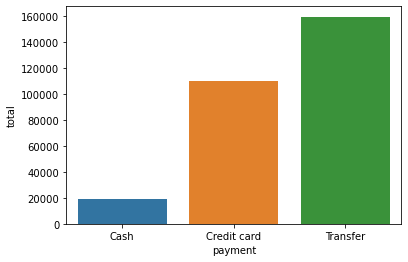

In [11]:
viz3=sns.barplot(x ='payment',y = 'total', data=y)
viz3.set_xticklabels(viz3.get_xticklabels())

In [12]:
#Visualizing Question 2
z=pd.DataFrame(sales_data.groupby('product_line').unit_price.mean())
z['product_line']= z.index
z

,unit_price,product_line
product_line,,
Breaking system,17.740522,Breaking system
Electrical system,25.585130,Electrical system
Engine,60.091803,Engine
Frame & body,42.832229,Frame & body
Miscellaneous,22.810738,Miscellaneous
Suspension & traction,33.969868,Suspension & traction


[Text(0, 0, 'Breaking system'),
 Text(1, 0, 'Electrical system'),
 Text(2, 0, 'Engine'),
 Text(3, 0, 'Frame & body'),
 Text(4, 0, 'Miscellaneous'),
 Text(5, 0, 'Suspension & traction')]

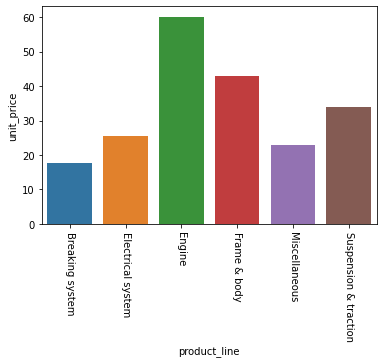

In [13]:
viz4=sns.barplot(x ='product_line',y = 'unit_price', data=z)
viz4.set_xticklabels(viz4.get_xticklabels(), rotation= -90)

In [14]:
#Average purchase value by client type
sales_data.groupby('client_type').total.mean()

client_type
Retail       167.058929
Wholesale    709.521467
Name: total, dtype: float64

In [15]:
viz5=sns.barplot(x ='product_line',y = 'total', data=p)
viz5.set_xticklabels(viz5.get_xticklabels(), rotation=-90)#Total purchase value by product line
sales_data.groupby('product_line').total.sum()

product_line
Breaking system          38350.15
Electrical system        43612.71
Engine                   37945.38
Frame & body             69024.73
Miscellaneous            27165.82
Suspension & traction    73014.21
Name: total, dtype: float64

In [16]:
#Visualizing the total purchase value by product line
p=pd.DataFrame(sales_data.groupby('product_line').total.sum())
p['product_line']= p.index
p

,total,product_line
product_line,,
Breaking system,38350.15,Breaking system
Electrical system,43612.71,Electrical system
Engine,37945.38,Engine
Frame & body,69024.73,Frame & body
Miscellaneous,27165.82,Miscellaneous
Suspension & traction,73014.21,Suspension & traction


[Text(0, 0, 'Breaking system'),
 Text(1, 0, 'Electrical system'),
 Text(2, 0, 'Engine'),
 Text(3, 0, 'Frame & body'),
 Text(4, 0, 'Miscellaneous'),
 Text(5, 0, 'Suspension & traction')]

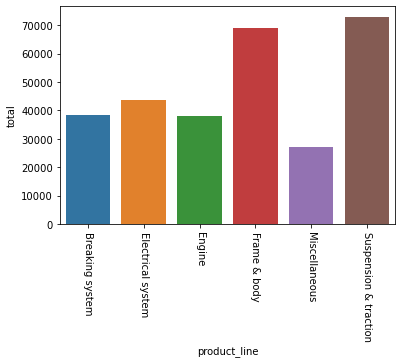

In [17]:
viz5=sns.barplot(x ='product_line',y = 'total', data=p)
viz5.set_xticklabels(viz5.get_xticklabels(), rotation=-90)

In [18]:
#Total purchase value by client type
sales_data.groupby('client_type').total.sum()

client_type
Retail       129470.67
Wholesale    159642.33
Name: total, dtype: float64

In [24]:
#Visualizing the purchase value by client type
c=pd.DataFrame(sales_data.groupby('client_type').total.sum())
c['client_type']= c.index
c

,total,client_type
client_type,,
Retail,129470.67,Retail
Wholesale,159642.33,Wholesale


[Text(0, 0, 'Retail'), Text(1, 0, 'Wholesale')]

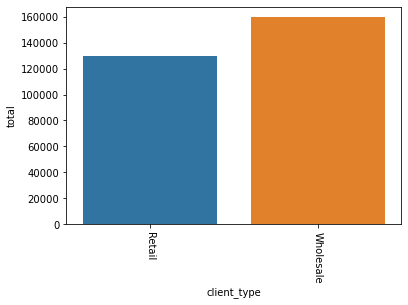

In [25]:
viz7=sns.barplot(x ='client_type',y = 'total', data=c)
viz7.set_xticklabels(viz7.get_xticklabels(), rotation=-90)

In [20]:
#Total purchase value by warehouse
sales_data.groupby('warehouse').total.sum()

warehouse
Central    141982.88
North      100203.63
West        46926.49
Name: total, dtype: float64

In [21]:
#Visualizing the total purchase value by warehouse
q=pd.DataFrame(sales_data.groupby('warehouse').total.sum())
q['warehouse']= q.index
q

,total,warehouse
warehouse,,
Central,141982.88,Central
North,100203.63,North
West,46926.49,West


[Text(0, 0, 'Central'), Text(1, 0, 'North'), Text(2, 0, 'West')]

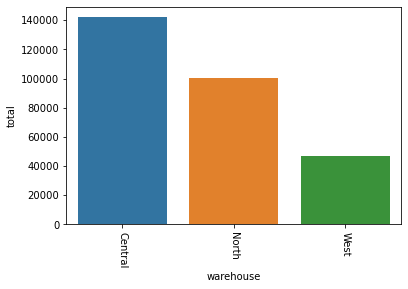

In [22]:
viz6=sns.barplot(x ='warehouse',y = 'total', data=q)
viz6.set_xticklabels(viz6.get_xticklabels(), rotation=-90)

## SUMMARY
#### From the analyzed data, the following deductions can be made
- The sales record was taken within  a time frame of 3 months
- The transfer payment method has the highest sales, while the cash has the lowest sales
- The average unit price for each product line is given as the following:
    -Breaking system          17.740522
    -Electrical system        25.585130
    -Engine                   60.091803
    -Frame & body             42.832229
    -Miscellaneous            22.810738
    -Suspension & traction    33.969868
    The Engine product line has the highest unit price while the Breaking system product line has the lowest unit price
- The Suspension and traction product line has the highest purchase value, while Miscellaneous has the lowest purchase value
- The Wholesale client type has the highest mean purchase value and also the highest sales 
- The highest sales is from the Central warehouse